## Imports

In [1]:
import numpy as np
import pandas as pd

## Load data

In [2]:
data = pd.read_csv('Pokemon.csv')

In [3]:
# Checking the head and some infos
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data.shape # Checking the shape

(800, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
# Checking null values
data.isnull().sum()/len(data)*100 # Type 2 is the only column with null values, more than 20%!!

#              0.00
Name           0.00
Type 1         0.00
Type 2        48.25
Total          0.00
HP             0.00
Attack         0.00
Defense        0.00
Sp. Atk        0.00
Sp. Def        0.00
Speed          0.00
Generation     0.00
Legendary      0.00
dtype: float64

In [7]:
# Let's handle with the null values, primally these Pokemon don't have a second type
# So I put -1 because I don't wanna to lose info
data = data.fillna('NaN')

In [8]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
data.isnull().sum()/len(data)*100

#             0.0
Name          0.0
Type 1        0.0
Type 2        0.0
Total         0.0
HP            0.0
Attack        0.0
Defense       0.0
Sp. Atk       0.0
Sp. Def       0.0
Speed         0.0
Generation    0.0
Legendary     0.0
dtype: float64

In [10]:
# The Mega evolutions are data that not much information, so let's filter
data = data.loc[~data['Name'].str.contains('Mega')]

In [11]:
# Checking if works
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [12]:
data.shape # The new shape

(751, 13)

## Now let's answer some questions

### Question: which are the most powerful Pokemon top 5?

In [13]:
data.sort_values('Total',ascending=False).head() # All of then are Legendary :O

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True


### Question: which Pokemon have more attack?

In [14]:
data.sort_values('Attack',ascending=False).head(1) # Groudon with Attack equal 180

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


### Question: which Pokemon have more defense?

In [15]:
data.sort_values('Defense',ascending=False).head(1) # Shuckle with Defense equal 230

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


### Question: which Pokemon are the more weak top 5?

In [16]:
data.sort_values('Total').head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False


### Question: which Pokemon non legendary are most strong?

In [17]:
non_legendary = data[(data['Total']>600) & (data['Legendary']==False)]
non_legendary.head() # Slaking is the most powerful non legendary Pokemon, what? More than Dragonite?

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False


### Question: which Pokemon have the most HP?

In [18]:
data.sort_values('HP',ascending=False).head(1) # Blissey with HP equal to 255

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


### Question: which is the fastest Pokemon?

In [19]:
data.sort_values('Speed',ascending=False).head(1) # Deoxys with Speed equal to 180

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


## Let's move to some visualization

In [20]:
# More imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:title={'center':'Legendary Pokemon'}, xlabel='Legendary', ylabel='count'>

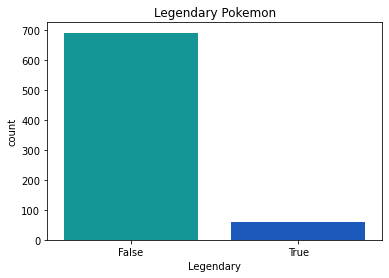

In [21]:
plt.title('Legendary Pokemon')
sns.countplot(x='Legendary',data=data,palette='winter_r') # We have more non legendary Pokemon

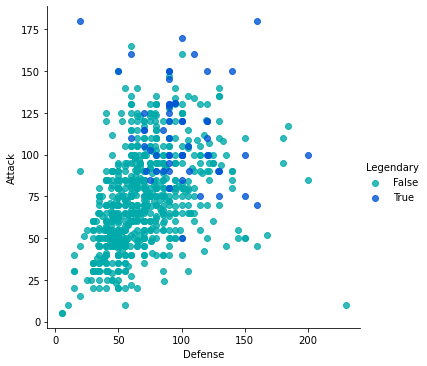

In [22]:
sns.lmplot(x='Defense', y='Attack', data=data, fit_reg=False, hue='Legendary',palette='winter_r')
# Legendary Pokemon have more Attack and Defense

### One Pokemon have one of the highest attack but have a low defense, which Pokemon?

In [29]:
high_atk_low_df = data[(data['Attack']>175) & (data['Defense']<50)]
high_atk_low_df # That Pokemon are Deoxys Attack form

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True


<AxesSubplot:title={'center':'Number of Each Type of Pokemon'}, xlabel='Type 1', ylabel='count'>

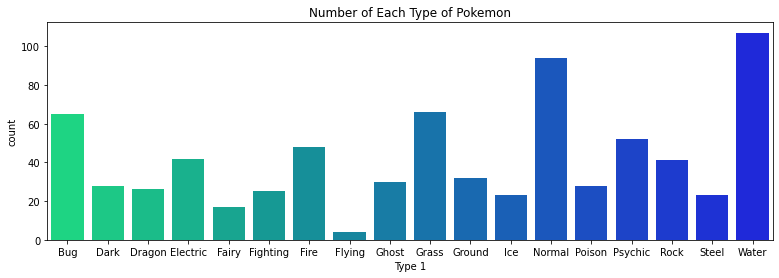

In [30]:
plt.figure(figsize=(13,4))
plt.title('Number of Each Type of Pokemon')
order = sorted(data['Type 1'].unique())
sns.countplot(x='Type 1',data=data,order=order,palette='winter_r') # The water type is the most common

<AxesSubplot:title={'center':'Count per Generation'}, xlabel='Generation', ylabel='count'>

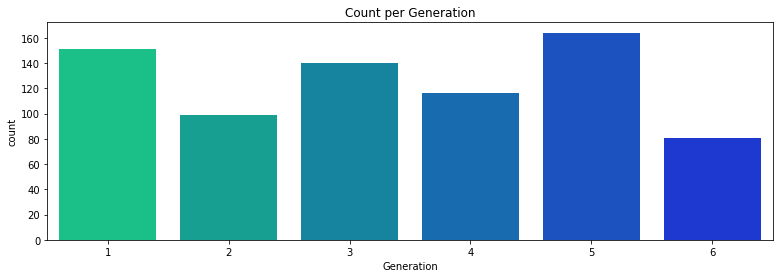

In [31]:
plt.figure(figsize=(13,4))
plt.title('Count per Generation')
order = sorted(data['Generation'].unique())
sns.countplot(x='Generation',data=data,order=order,palette='winter_r') # Generation 5 have more Pokemon in this df
# Generation 6 have Mega Pokemon and we drop, because of it there is less Pokemon

### Which Pokemon type is the strongest?

<AxesSubplot:title={'center':'Best Pokemon Type'}, xlabel='Type 1', ylabel='Total'>

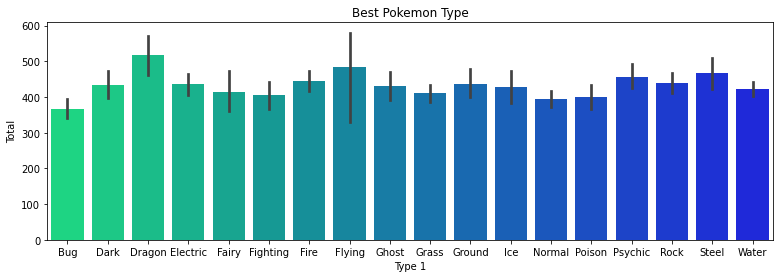

In [32]:
plt.figure(figsize=(13,4))
plt.title('Best Pokemon Type')
order = sorted(data['Type 1'].unique())
sns.barplot(x='Type 1',y='Total',data=data,order=order,palette='winter_r')
# Dragon is the strongest Pokemon type

### Which Pokemon type don't have legendaries?

<AxesSubplot:title={'center':'Non Legendary Pokemon'}, xlabel='Type 1', ylabel='Total'>

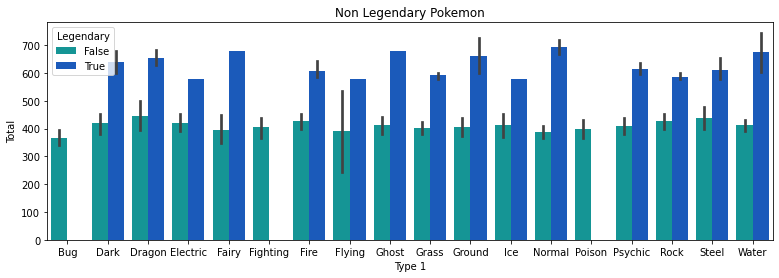

In [33]:
plt.figure(figsize=(13,4))
plt.title('Non Legendary Pokemon')
order = sorted(data['Type 1'].unique())
sns.barplot(x='Type 1',y='Total',hue='Legendary',data=data,order=order,palette='winter_r')
# Bug, fighting and poison don't have any legendary

In [34]:
# Baseline for our model
59/len(data)

0.07856191744340879

## Modeling and predicting if a Pokemon is legendary or not

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [36]:
label_encoder = LabelEncoder()

In [37]:
# Droping # and Name columns
data.drop(['#','Name'],axis=1,inplace=True)

In [38]:
data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Fire,NaN,405,58,64,58,80,65,80,1,False


### Transform categorical features

In [39]:
# Categorical features
columns = (data.dtypes == 'object')
object_cols = list(columns[columns].index)
print('Categorical variables:')
print(object_cols)

Categorical variables:
['Type 1', 'Type 2']


In [40]:
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [41]:
data['Legendary'] = data['Legendary'].map({True:1, False:0})

In [42]:
# Checking if it works
data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,14,318,45,49,49,65,65,45,1,0
1,9,14,405,60,62,63,80,80,60,1,0
2,9,14,525,80,82,83,100,100,80,1,0
4,6,12,309,39,52,43,60,50,65,1,0
5,6,12,405,58,64,58,80,65,80,1,0


In [43]:
data['Legendary'].value_counts() # Unbalanced data

0    692
1     59
Name: Legendary, dtype: int64

### Spliting the data

In [44]:
X = data.drop('Legendary',axis=1)
y = data['Legendary']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
X_train.shape, X_test.shape # The shape of data after the split

((503, 10), (248, 10))

### Creating the model

In [48]:
# Let's use a robust algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

### Training the model

In [49]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Predictions

In [50]:
predictions = model.predict(X_test)

### Evaluating the model

In [51]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       234
           1       0.67      1.00      0.80        14

    accuracy                           0.97       248
   macro avg       0.83      0.99      0.89       248
weighted avg       0.98      0.97      0.97       248



In [53]:
print(roc_auc_score(predictions,y_test))

0.8333333333333333


### Tuning the parameters

In [54]:
model = RandomForestClassifier(n_estimators=200,max_features=5,max_leaf_nodes=20,random_state=42)

In [55]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features=5, max_leaf_nodes=20, n_estimators=200,
                       random_state=42)

In [56]:
tune_predictions = model.predict(X_test)

In [57]:
print(classification_report(y_test,tune_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       234
           1       0.67      1.00      0.80        14

    accuracy                           0.97       248
   macro avg       0.83      0.99      0.89       248
weighted avg       0.98      0.97      0.97       248



In [58]:
print(roc_auc_score(tune_predictions,y_test))

0.8333333333333333


In [59]:
# Even adjusting some hyperparameters, we were unable to improve the model.

### Conclusion

In [60]:
# Our model is good to predict non legendary Pokemon, and is best than the baseline to predict legendary ones

### Saving the model

In [61]:
import joblib

In [62]:
filename = 'model.joblib'

In [63]:
joblib.dump(model,filename)

['model.joblib']